<a href="https://colab.research.google.com/github/luyuzhe111/machine-learning-foundamentals/blob/main/spectral_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('hw4_p4.pkl', 'rb') as f:
  data = pickle.load(f)

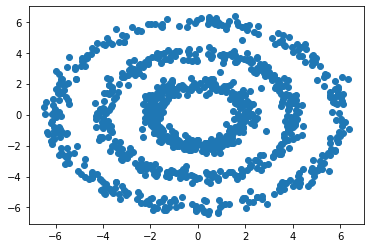

In [3]:
plt.scatter(data[:, 0], data[:, 1])

In [4]:
def rbf_kernel(x, y=None, gamma=2):
  if not y:
    y = x
  return np.exp(-gamma*(np.sum(((x[:, None, :] -y[None, :, :])**2), axis=-1)))

In [5]:
W = rbf_kernel(data, gamma=4)

In [6]:
degrees = W.sum(1)

In [7]:
D = np.eye(len(degrees)) * degrees

In [8]:
L = D - W

In [9]:
B = np.linalg.inv(D) @ L

In [10]:
eigval, eigvec = np.linalg.eig(B)
eigvec = eigvec[:, np.argsort(eigval)]

In [11]:
k = 3

In [12]:
X_hat = eigvec[:, 1:k+1]

In [13]:
for i in range(len(X_hat)):
  X_hat[i, :] /= np.linalg.norm(X_hat[i, :])

In [14]:
from sklearn.cluster import KMeans

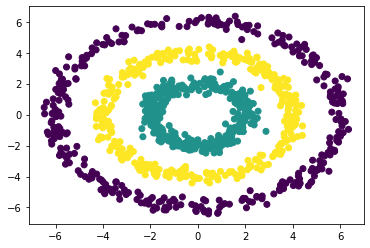

In [15]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_hat)
labels = kmeans.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)

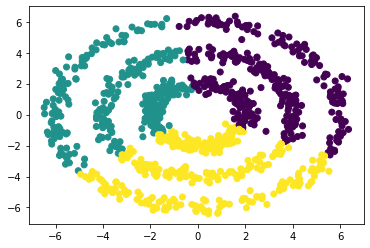

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
labels = kmeans.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)